<a href="https://colab.research.google.com/github.com/fgonzaleumbc/DATA601/blob/main/Lecture11/24a_Linear_Regression_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd  
import seaborn as sns 
%matplotlib inline
from numpy.linalg import inv

# For linear regression, we will need
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In this example, we will use Boston house prices dataset. You can load the dataset by running the cell below. 

Here are you tasks:
1. Basic EDA
2.a. Build a simple linear regression model (using only one feature) to predict the house price, <br>
b. determine your model's applicability (R^2) and accuracy (MSE) both for training and testing, and <br> 
c. Visualize ground-truth vs. prediction.
3. a. Build a linear regression model with two features to to predict the house price, <br>
b. determine your model's applicability (R^2) and accuracy (MSE) both for training and testing, and <br> 
c. Visualize ground-truth vs. prediction.
4. Repeat task-3(a) with linear algebra

Use 80/20 train-test split.

In [4]:
# load the housing data from the scikit-learn library
# Initially this notebook was setup to use the boston dataset.
# However, ethical concerns have been found and notebook was updated to use the california housing dataset.
from sklearn.datasets import fetch_california_housing#, load_boston 
housing_dataset = fetch_california_housing()

# Check these links for more information
# https://scikit-learn.org/stable/modules/classes.html#module-sklearn.datasets
# https://scikit-learn.org/stable/datasets/toy_dataset.html
# https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html#sklearn.datasets.fetch_california_housing

See documentation of the housing dataset specifically the section "Returns::"
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html#sklearn.datasets.fetch_california_housing

In [5]:
print(housing_dataset.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])


In [6]:
print(housing_dataset.DESCR) # Description of the California housing dataset.

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [7]:
# Create a dataframe
housing = pd.DataFrame(housing_dataset.data, columns=housing_dataset.feature_names)
housing.head(10)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25
7,3.1200,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25
8,2.0804,42.0,4.294118,1.117647,1206.0,2.026891,37.84,-122.26
9,3.6912,52.0,4.970588,0.990196,1551.0,2.172269,37.84,-122.25


In [8]:
print(housing.keys())

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')


In [9]:
# The target value Average House Value (AHV) is missing from the data. 
# Create a new column of target values and add it to the dataframe.
# Target value corresponds to the average house value in units of 100,000. If as_frame is True, target is a pandas object.
housing['AHV'] = housing_dataset.target
housing.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,AHV
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [10]:
housing.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,AHV
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


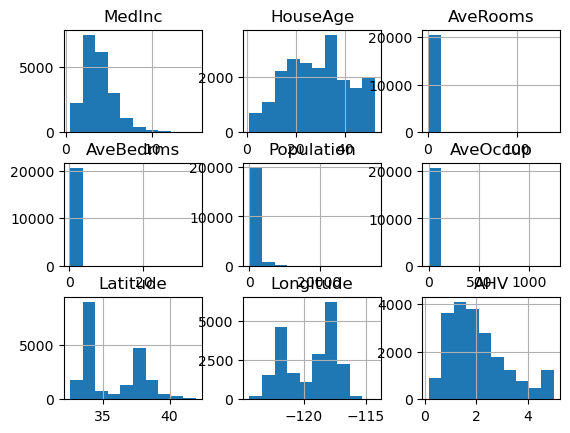

In [11]:
housing.hist();

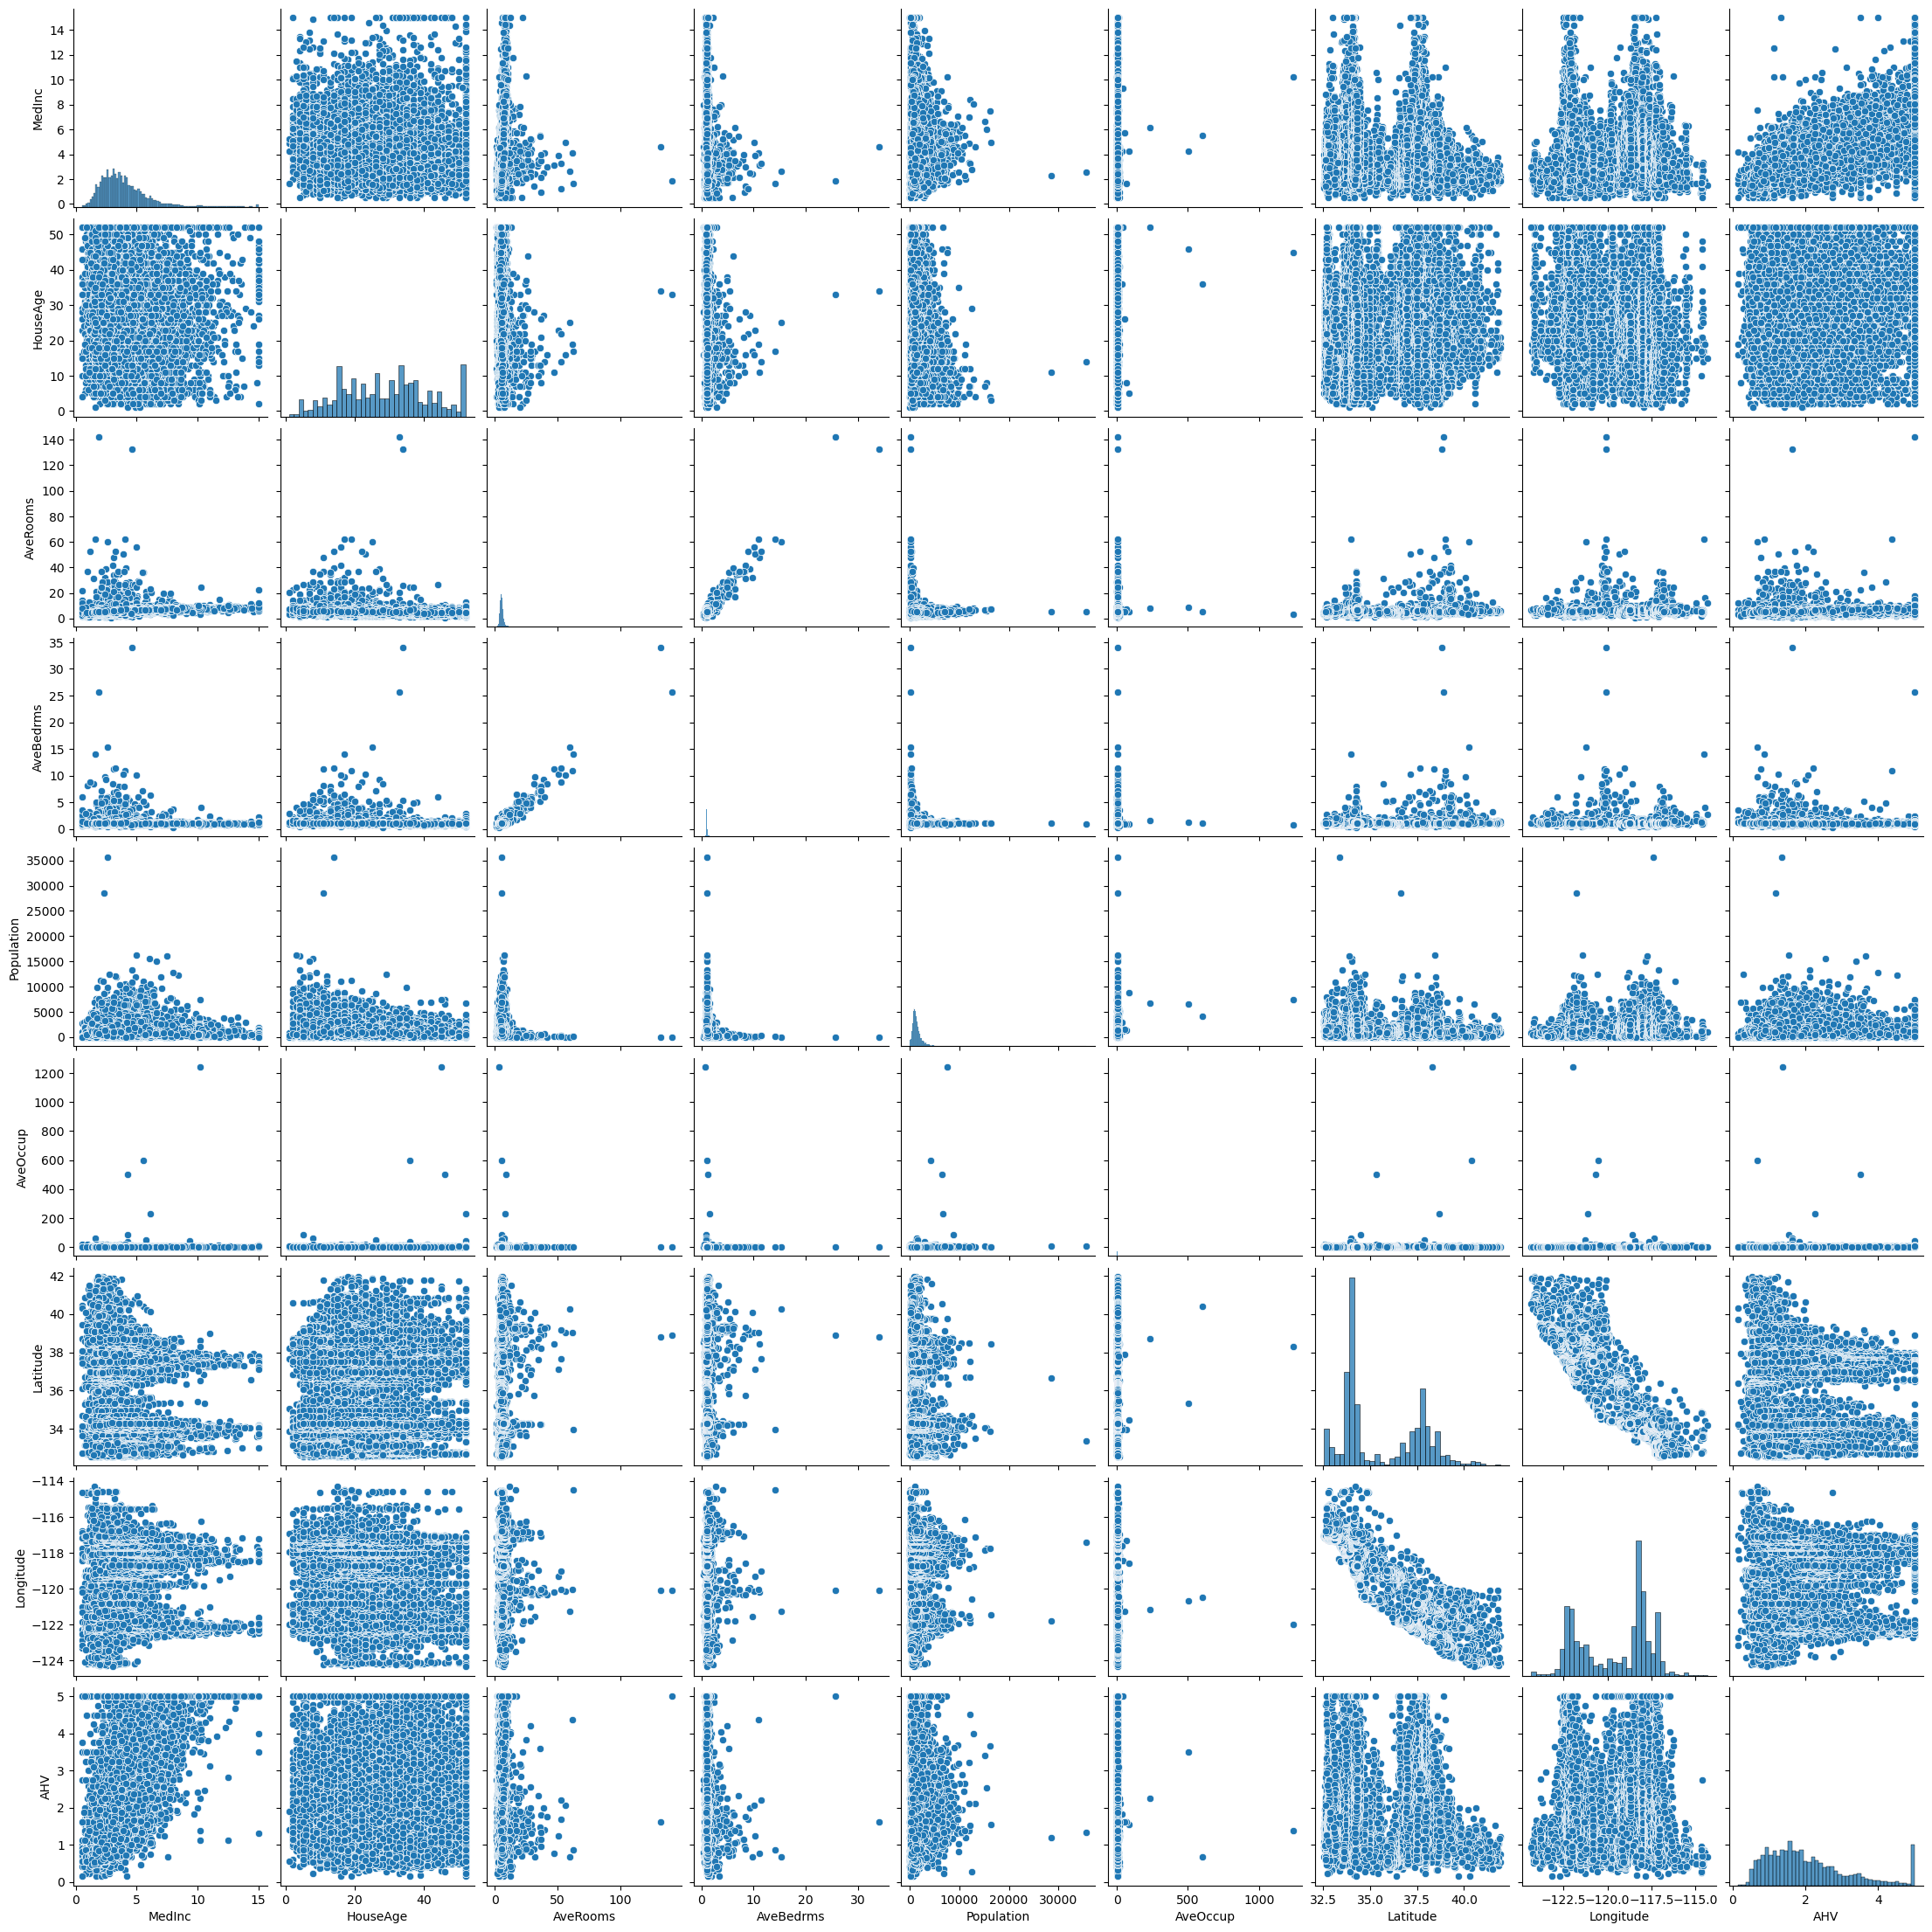

In [12]:
sns.pairplot(housing);

In [13]:
# Average bedrooms seem to have some outliers. This still make sense on big houses.
# This average occupancy seems high and could make sense removing them if they are not correct.
housing[housing['AveOccup'] > 20]

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,AHV
3364,5.5179,36.0,5.142857,1.142857,4198.0,599.714286,40.41,-120.51,0.67500
5986,1.8750,52.0,4.500000,1.206349,2688.0,21.333333,34.10,-117.71,2.12500
8874,9.3370,52.0,7.285714,1.214286,1154.0,41.214286,34.06,-118.45,5.00001
9172,4.2391,5.0,5.123810,0.933333,8733.0,83.171429,34.47,-118.59,1.54600
12104,1.6250,8.0,7.600000,0.950000,1275.0,63.750000,33.97,-117.33,1.62500
13034,6.1359,52.0,8.275862,1.517241,6675.0,230.172414,38.69,-121.15,2.25000
13366,4.2578,36.0,5.258824,1.117647,2886.0,33.952941,33.94,-117.63,1.83300
16420,5.7485,26.0,5.366667,0.900000,1542.0,51.400000,37.89,-121.29,1.62500
16669,4.2639,46.0,9.076923,1.307692,6532.0,502.461538,35.32,-120.70,3.50000
19006,10.2264,45.0,3.166667,0.833333,7460.0,1243.333333,38.32,-121.98,1.37500


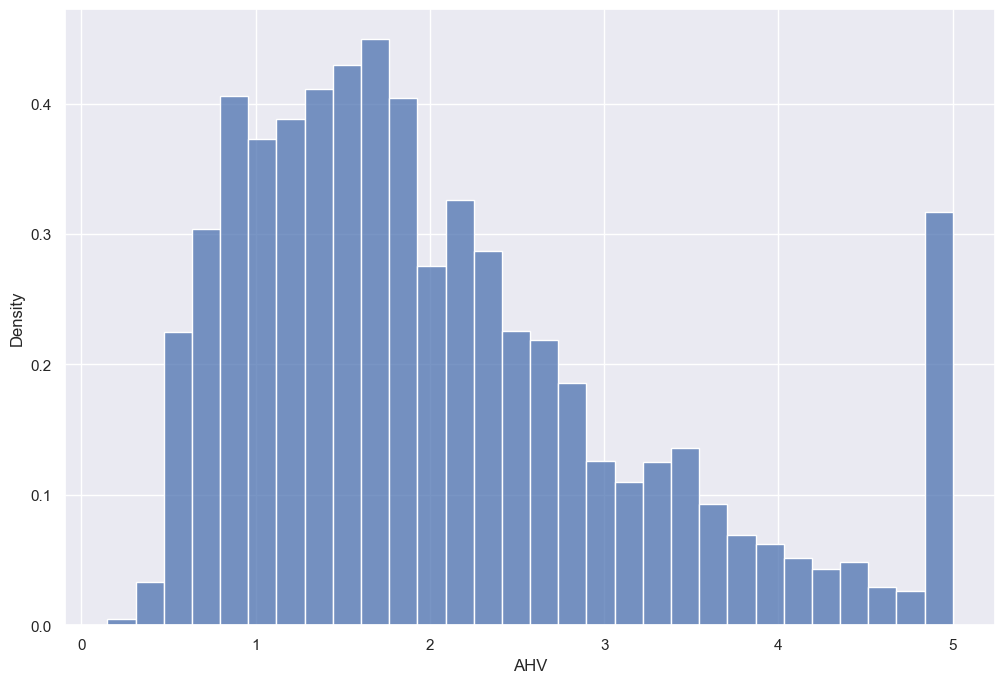

In [14]:
sns.set(rc={'figure.figsize':(12,8)})
sns.histplot(housing['AHV'], bins=30, stat = 'density')
# Change distplot to displot or histplot as distplot will be depracated in future versions
plt.show()

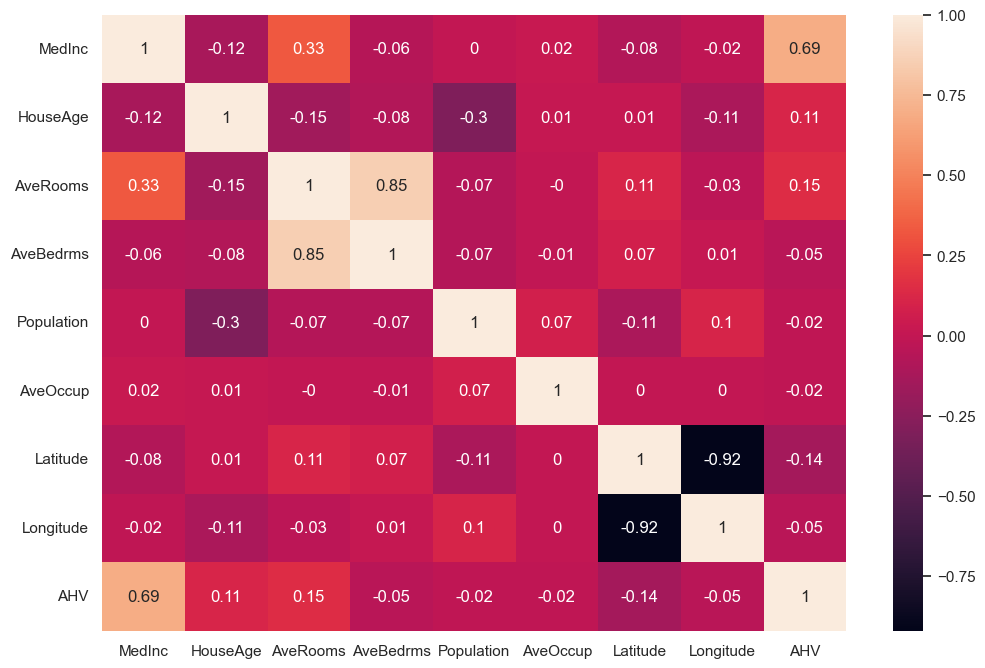

In [15]:
# let's look at the correlation among columns
correlation_matrix = housing.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True);

Build a simple linear regression model (x = one of the features, y = ahv)

In [16]:
# Preparing the data for training the model
X = housing['MedInc'].values.reshape(-1, 1)
Y = housing['AHV'].values.reshape(-1, 1)
# Note that X and Y are converted to an array.

In [17]:
X

array([[8.3252],
       [8.3014],
       [7.2574],
       ...,
       [1.7   ],
       [1.8672],
       [2.3886]])

In [18]:
Y

array([[4.526],
       [3.585],
       [3.521],
       ...,
       [0.923],
       [0.847],
       [0.894]])

In [19]:
# In machine learning you will typically divide your dataset into a training and a test sample.
# The training sample is typically 80% to the test sample of 20%.
# The split can be done manually or using the train_test_split function.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=17)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(16512, 1)
(4128, 1)
(16512, 1)
(4128, 1)


In [20]:
# X/Y train/test split could also be done manually.
# Top/bottom 80/20. Could also use a random sampling to select specific percentages of the data.
# Best practice would be to do a random sampling like the train_test_split function does.

In [21]:
simple_lin_model = LinearRegression()
simple_lin_model.fit(X_train, Y_train)

LinearRegression()

In [22]:
# Model evaluation for training set
y_train_predict = simple_lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

The model performance for training set
--------------------------------------
RMSE is 0.8402773773979837
R2 score is 0.47209370868359146




In [23]:
# Model evaluation for testing set
y_test_predict = simple_lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for testing set
--------------------------------------
RMSE is 0.8254731301957812
R2 score is 0.4788799383198358


To fit a linear regression model, we select those features which have a high correlation with our target variable AHV. By looking at the correlation matrix we can see that MedInc has a strong positive correlation with AHV (0.69) where as AveRooms the second highest correlation with AHV (0.15).

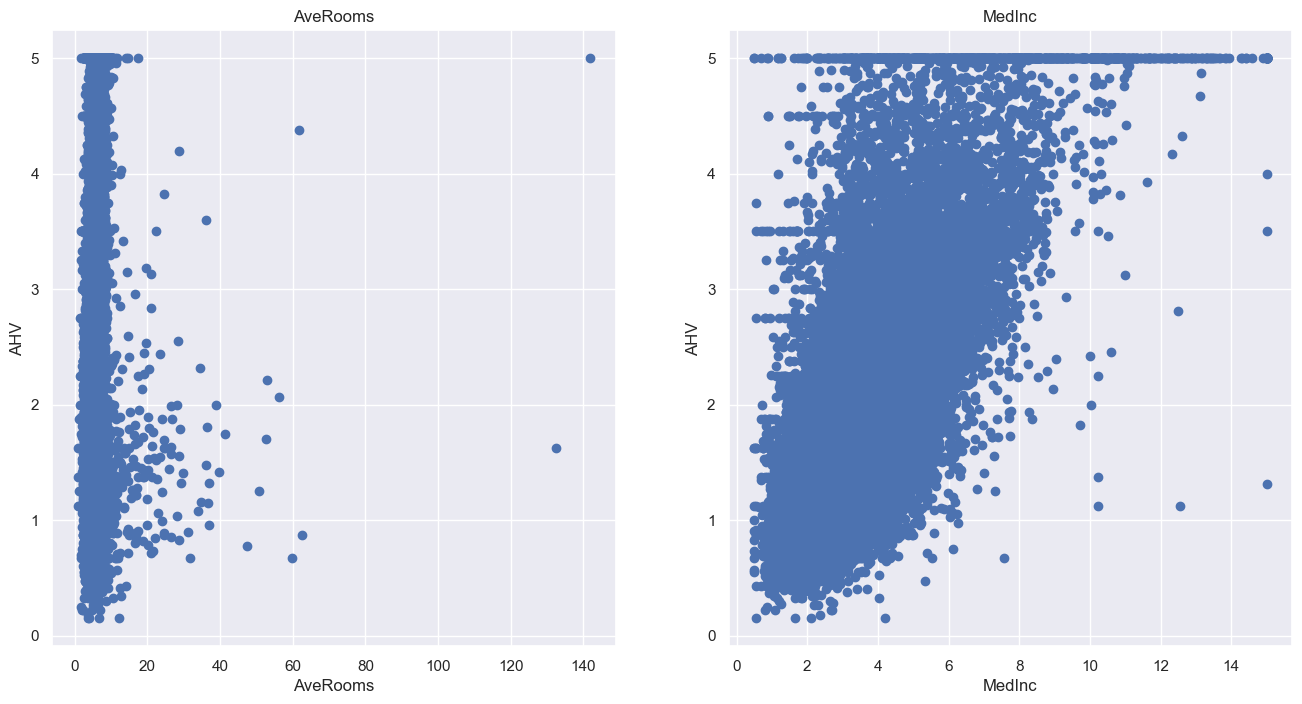

In [24]:
plt.figure(figsize=(16, 8))

features = ['AveRooms', 'MedInc']
target = housing['AHV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = housing[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('AHV')

In [25]:
# numpy.c_ translates slice objects to concatenation along the second axis.
# Preparing the data for training the model
X = pd.DataFrame(np.c_[housing['AveRooms'], 
                       housing['MedInc']], 
                 columns = ['AveRooms',
                            'MedInc'])
X

,AveRooms,MedInc
0,6.984127,8.3252
1,6.238137,8.3014
2,8.288136,7.2574
3,5.817352,5.6431
4,6.281853,3.8462
...,...,...
20635,5.045455,1.5603
20636,6.114035,2.5568
20637,5.205543,1.7000
20638,5.329513,1.8672


In [26]:
Y = housing['AHV'] # Note that Y is an array with matching index to the dataframe values.
Y

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: AHV, Length: 20640, dtype: float64

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=17)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(16512, 2)
(4128, 2)
(16512,)
(4128,)


In [28]:
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression()

In [29]:
# Model evaluation
# model evaluation for training set
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

The model performance for training set
--------------------------------------
RMSE is 0.8353435802154757
R2 score is 0.47827484855725344




In [30]:
# Model evaluation for testing set
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for testing set
--------------------------------------
RMSE is 0.8214433643641914
R2 score is 0.4839554905305836


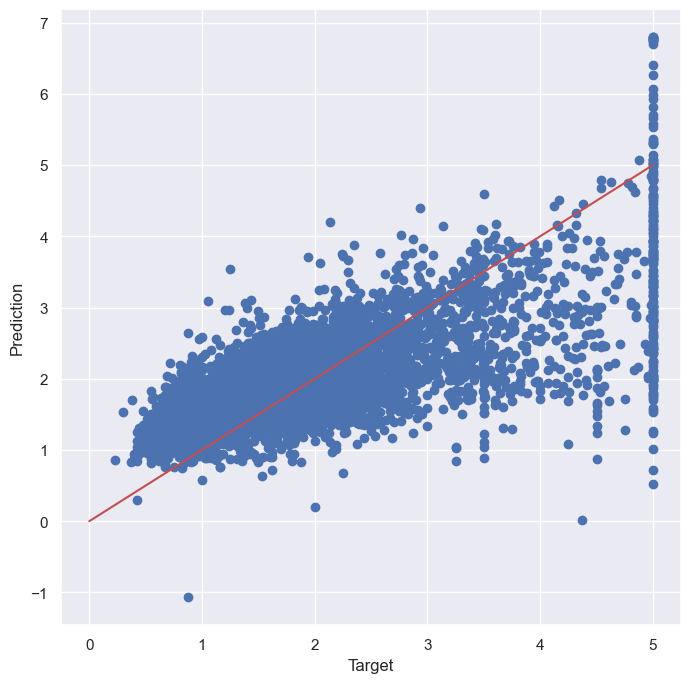

In [31]:
plt.figure(figsize=(8, 8))
linex = np.arange(0,6) # Could also use the housing['AHV'].max()+1 to make sure we capture all.
plt.plot(linex, linex, 'r')
plt.scatter(Y_test,y_test_predict)
plt.xlabel('Target')
plt.ylabel('Prediction')
plt.show();

Let's add another feature to the x (in this case we add "HouseAge").

In [32]:
# Preparing the data for training the model
X = pd.DataFrame(np.c_[housing['AveRooms'], 
                       housing['MedInc'], 
                       housing['HouseAge']], 
                 columns = ['AveRooms',
                            'MedInc',
                            'HouseAge'])
Y = housing['AHV']

The model performance for training set
--------------------------------------
RMSE is 0.8067805914921327
R2 score is 0.5133436673058877


The model performance for testing set
--------------------------------------
RMSE is 0.8031283864777451
R2 score is 0.5067105097162725


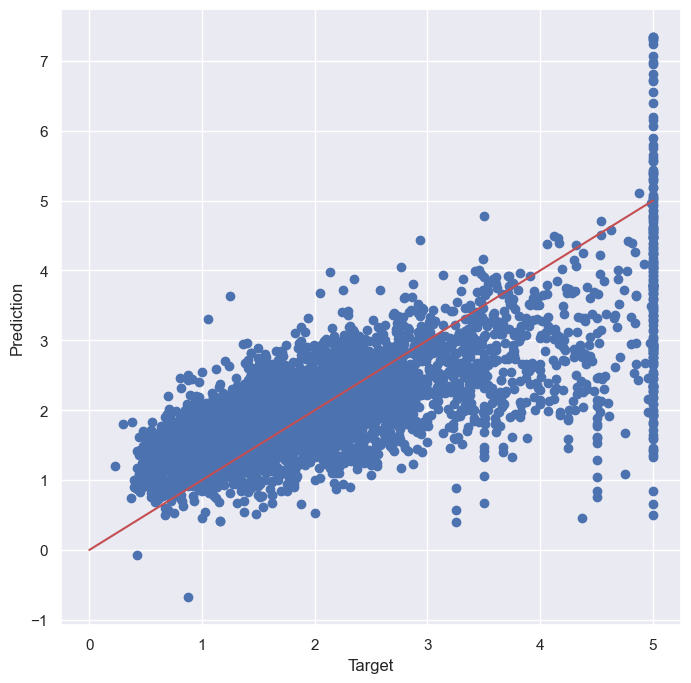

In [33]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=17)
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)
# Model evaluation
# model evaluation for training set
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

plt.figure(figsize=(8, 8))
linex = np.arange(0,6)
plt.plot(linex,linex,'r')
plt.scatter(Y_test,y_test_predict)
plt.xlabel('Target')
plt.ylabel('Prediction')
plt.show();

## Linear Regression with Numpy's Linear Algebra
Reference: https://numpy.org/doc/stable/reference/routines.linalg.html#module-numpy.linalg

### Training

In [34]:
# let's get our LR coefficients
beta = np.dot(inv(np.dot(X_train.T,X_train)), np.dot(X_train.T,Y_train))
# let's make some prediction on our TRAINING DATA
Y_train_predict = np.dot(X_train, beta)
print(beta)

[-0.02702945  0.44313014  0.01743223]


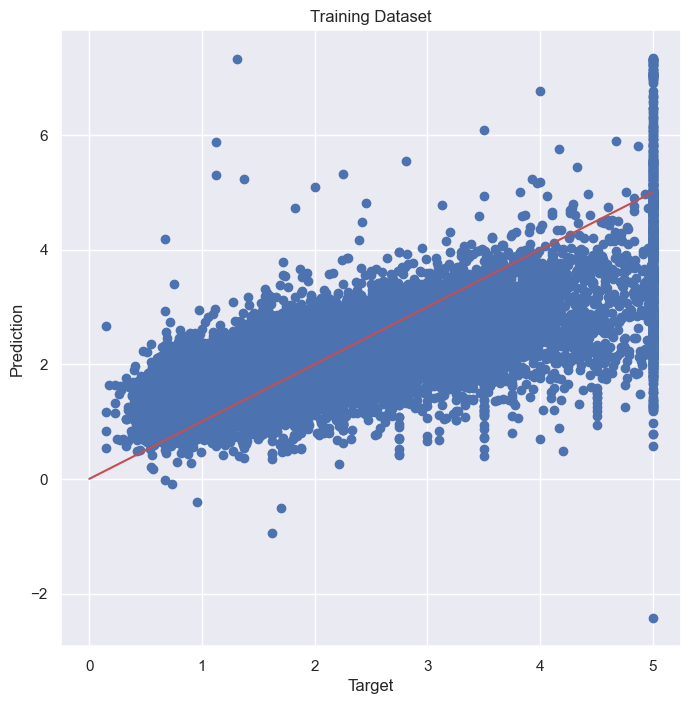

In [35]:
plt.figure(figsize=(8, 8))
linex = np.arange(0,6)
plt.plot(linex,linex,'r')
plt.scatter(Y_train,Y_train_predict)
plt.xlabel('Target')
plt.ylabel('Prediction')
plt.title('Training Dataset')
plt.show();

In [36]:
rmse = (np.sqrt(mean_squared_error(Y_train,Y_train_predict)))
r2 = r2_score(Y_train,Y_train_predict)

print("The model performance for TRAINING set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for TRAINING set
--------------------------------------
RMSE is 0.8067805919945007
R2 score is 0.513343666699823


### Testing

In [37]:
Y_test_predict = np.dot(X_test,beta)

rmse = (np.sqrt(mean_squared_error(Y_test, Y_test_predict)))
r2 = r2_score(Y_test, Y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for testing set
--------------------------------------
RMSE is 0.803129311606326
R2 score is 0.5067093732691574


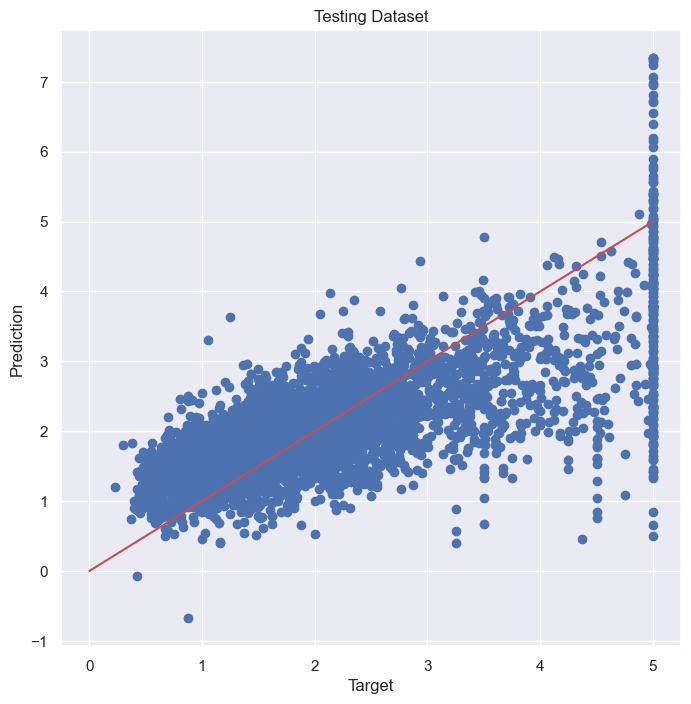

In [38]:
plt.figure(figsize=(8, 8))
linex = np.arange(0,6)
plt.plot(linex,linex,'r')
plt.scatter(Y_test,Y_test_predict)
plt.xlabel('Target')
plt.ylabel('Prediction')
plt.title('Testing Dataset')
plt.show();

# Notebook End